In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler

pd.set_option("display.max_columns", None)

In [2]:
current_dir = os.getcwd()
data_folder = os.path.join(current_dir, "data")

In [3]:
train_data = pd.read_csv(os.path.join(data_folder, "churn-bigml-80.csv"))
train_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [4]:
test_data = pd.read_csv(os.path.join(data_folder, "churn-bigml-20.csv"))
test_data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,WI,114,415,No,Yes,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,False
663,AL,106,408,No,Yes,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,False
664,VT,60,415,No,No,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,False
665,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False


In [5]:
train_data["Churn"].unique()

array([False,  True])

In [6]:
test_data["Churn"].unique()

array([False,  True])

In [7]:
print(len(train_data["State"].unique()))
print(train_data["State"].unique())

51
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'WV' 'RI' 'IA' 'MT' 'ID' 'VT' 'VA'
 'TX' 'FL' 'CO' 'AZ' 'NE' 'WY' 'IL' 'NH' 'LA' 'GA' 'AK' 'MD' 'AR' 'WI'
 'OR' 'DE' 'IN' 'UT' 'CA' 'SD' 'NC' 'WA' 'MN' 'NM' 'NV' 'DC' 'NY' 'KY'
 'ME' 'MS' 'MI' 'SC' 'TN' 'PA' 'HI' 'ND' 'CT']


In [8]:
print(len(test_data["State"].unique()))
print(test_data["State"].unique())

51
['LA' 'IN' 'NY' 'SC' 'HI' 'AK' 'MI' 'ID' 'VA' 'WI' 'MN' 'VT' 'MT' 'MA'
 'KY' 'CO' 'AZ' 'CA' 'WA' 'NE' 'OH' 'MO' 'AL' 'NH' 'NM' 'OR' 'TX' 'MS'
 'WY' 'FL' 'KS' 'NC' 'SD' 'OK' 'CT' 'RI' 'DE' 'UT' 'NV' 'DC' 'ME' 'IL'
 'NJ' 'MD' 'WV' 'PA' 'ND' 'AR' 'TN' 'IA' 'GA']


In [9]:
train_data["Area code"].unique()

array([415, 408, 510])

In [10]:
test_data["Area code"].unique()

array([408, 415, 510])

In [11]:
train_data["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
test_data["International plan"].unique()

array(['No', 'Yes'], dtype=object)

In [13]:
train_data["Voice mail plan"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
test_data["Voice mail plan"].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
train_encoded = train_data.copy()
train_encoded["Area code"] = train_encoded["Area code"].astype(str)  
train_encoded["Churn"] = train_encoded["Churn"].apply(lambda x: 1 if x else 0)
train_encoded = pd.get_dummies(train_encoded, drop_first=True)
train_encoded

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2662,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2663,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2664,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [16]:
test_encoded = test_data.copy()
test_encoded["Area code"] = test_encoded["Area code"].astype(str)  
test_encoded["Churn"] = test_encoded["Churn"].apply(lambda x: 1 if x else 0)
test_encoded = pd.get_dummies(test_encoded, drop_first=True)
test_encoded

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,117,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,65,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,161,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,111,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,49,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,114,26,137.1,88,23.31,155.7,125,13.23,247.6,94,11.14,11.5,7,3.11,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
663,106,29,83.6,131,14.21,203.9,131,17.33,229.5,73,10.33,8.1,3,2.19,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
664,60,0,193.9,118,32.96,85.0,110,7.23,210.1,134,9.45,13.2,8,3.56,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
665,159,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [17]:
num_cols = train_encoded.select_dtypes(include=[np.number]).columns.drop("Churn")
print(len(num_cols))
num_cols

69


Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT',
       'State_DC', 'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IA',
       'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA',
       'State_MA', 'State_MD', 'State_ME', 'State_MI', 'State_MN', 'State_MO',
       'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
       'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK',
       'State_OR', 'State_PA', 'State_RI', 'State_SC', 'State_SD', 'State_TN',
       'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI',
       'State_W

In [18]:
scaler = StandardScaler()
train_encoded[num_cols] = scaler.fit_transform(train_encoded[num_cols])
train_encoded

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,0.692163,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,7.090080,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
1,0.161278,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
2,0.919686,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,7.233257,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,-0.615795
3,-0.420168,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,-0.988810,-0.584569,2.978938,-0.615795
4,-0.647691,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.1295

In [19]:
test_encoded[num_cols] = scaler.transform(test_encoded[num_cols])
test_encoded

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,0.414080,-0.589414,0.092590,-0.165639,0.093075,2.968355,-0.993351,2.969232,0.288179,-0.520538,0.287702,-0.551334,-0.190317,-0.550692,-0.429172,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,8.670146,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.13825,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,-0.988810,-0.584569,-0.335690,-0.615795
1,-0.900493,-0.589414,-0.929547,1.835921,-0.929282,0.551880,-0.844524,0.551247,0.150304,0.561110,0.152016,0.883476,0.624104,0.884198,1.859175,1,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,6.954881,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.13825,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,-0.615795
2,1.526412,-0.589414,2.830588,-1.666809,2.830213,2.304855,-0.149999,2.304113,-0.799061,1.436730,-0.797784,-1.735052,1.845734,-1.733148,1.859175,1,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.13825,-0.129542,-0.153025,6.181091,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,-0.615795
3,0.262399,-0.589414,-1.274564,0.134595,-1.274408,-1.238393,0.098046,-1.238570,-0.227866,0.252068,-0.228779,-0.910036,0.624104,-0.909415,0.333610,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.13825,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,7.308089,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,-0.615795
4,-1.304977,-0.589414,-1.110358,0.835141,-1.110527,0.288835,0.445308,0.287971,-0.442556,-0.520538,-0.443250,0.309552,-1.411947,0.312899,-0.429172,0,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,7.719515,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.13825,-0.129542,-0.1

In [20]:
# Compute the correlation matrix
correlation_matrix = train_encoded.corr()

# Extract the correlation with the target variable 'Churn'
churn_correlation = correlation_matrix["Churn"].sort_values(ascending=False)

# Display the correlation with 'Churn'
print("Correlation with Churn:")
print(churn_correlation)

Correlation with Churn:
Churn                     1.000000
International plan_Yes    0.277489
Customer service calls    0.202590
Total day charge          0.195689
Total day minutes         0.195688
                            ...   
State_HI                 -0.036765
State_VA                 -0.039081
Total intl calls         -0.069882
Number vmail messages    -0.086474
Voice mail plan_Yes      -0.099291
Name: Churn, Length: 70, dtype: float64


In [21]:
input_features = train_encoded.drop(columns=["Churn"])
correlation_matrix = input_features.corr()

print("Correlation Matrix (between input features):")
correlation_matrix

Correlation Matrix (between input features):


,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
Account length,1.000000,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,-0.010188,-0.018458,0.008250,-0.000391,0.005182,-0.023438,0.017378,-0.002398,0.033286,0.000113,0.014640,-0.018605,0.007489,0.001331,0.004476,0.016370,-0.023537,0.027932,-0.034097,0.001584,-0.002499,0.003056,0.012073,0.010824,0.008859,-0.037762,0.009936,0.021041,-0.000656,0.005595,-0.005803,0.019850,0.014659,-0.017754,-0.008174,0.035432,-0.002923,0.005148,-0.013677,-0.029467,0.021433,-0.032553,-0.030161,-0.002763,0.021230,0.012432,0.008645,-0.014259,-0.028746,0.019166,0.004520,-0.008603,0.024500,0.002448
Number vmail messages,-0.002996,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.014977,-0.023251,0.009846,0.016480,0.001820,-0.018601,0.010916,-0.007869,0.015617,0.030354,0.006499,-0.004610,0.025520,-0.011763,-0.008056,-0.009393,-0.002174,0.001995,0.005953,-0.003030,-0.004733,-0.011574,0.008700,-0.000626,0.015536,0.021491,0.014949,0.038732,0.014125,-0.013113,0.016438,-0.018595,-0.018308,-0.011097,0.029190,0.002565,-0.024568,0.001962,-0.005606,0.003475,0.013529,-0.006023,-0.018458,0.012765,-0.016104,-0.016241,-0.038355,0.001967,0.013126,-0.011607,0.012807,-0.001567,0.005858,0.957159
Total day minutes,0.002847,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.026136,-0.011829,-0.013859,0.002289,0.000089,-0.014434,-0.028391,-0.015321,-0.002398,0.017688,-0.016208,0.006078,-0.013627,-0.023013,0.046287,0.043450,-0.009543,-0.016760,-0.007028,0.053565,0.007512,-0.001207,0.000385,-0.024173,-0.015074,-0.015653,0.016246,0.016144,-0.002722,-0.004626,0.050006,-0.013856,-0.004887,-0.020282,0.015309,0.001349,-0.025923,0.036112,-0.013018,-0.042800,0.030100,0.007758,0.004149,0.011441,-0.001210,0.009906,-0.010041,-0.010464,-0.025461,0.001337,0.039307,-0.025226,0.049550,0.013438
Total day calls,0.038862,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,-0.006943,0.027301,0.007437,0.001700,-0.040867,-0.012797,-0.015584,-0.012307,-0.007828,0.029456,0.004471,0.022994,0.056494,0.004814,0.039605,-0.000018,-0.007798,0.015359,0.009211,-0.018806,0.001369,-0.009134,-0.011587,-0.002990,0.014272,-0.035692,0.020631,0.001967,-0.036857,0.005015,-0.006573,0.008891,0.015324,-0.009178,-0.004164,-0.003547,-0.044364,-0.008321,0.003827,0.008636,-0.043765,-0.004075,0.006726,-0.004760,0.044994,0.005361,0.001427,-0.025347,0.038735,0.008157,-0.003936,-0.008901,-0.004277,-0.007541
Total day charge,0.002843,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.026124,-0.011833,-0.013863,0.002290,0.000094,-0.014437,-0.028387,-0.015315,-0.002390,0.017691,-0.016227,0.006085,-0.013628,-0.023002,0.046292,0.043451,-0.009538,-0.016764,-0.007034,0.053569,0.007520,-0.001217,0.000382,-0.024162,-0.015074,-0.015660,0.016245,0.016150,-0.002733,-0.004632,0.050000,-0.013863,-0.004886,-0.020271,0.015317,0.001344,-0.025916,0.036109,-0.0

In [22]:
# Set the diagonal values to NaN to exclude self-to-self correlations
np.fill_diagonal(correlation_matrix.values, np.nan)

# Mask the lower triangle of the correlation matrix
mask = np.tril(np.ones(correlation_matrix.shape)).astype(bool)
correlation_matrix = correlation_matrix.mask(mask)

# Find the pairs of features with the highest correlation values
correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False).dropna()

# Display the top 10 highest correlated feature pairs
print("Top 10 highest correlated feature pairs:")
print(correlation_pairs.head(10))

Top 10 highest correlated feature pairs:
Total day charge        Total day minutes         1.000000
Total eve charge        Total eve minutes         1.000000
Total night charge      Total night minutes       0.999999
Total intl charge       Total intl minutes        0.999993
Voice mail plan_Yes     Number vmail messages     0.957159
International plan_Yes  State_IL                  0.071832
State_AR                Customer service calls    0.059910
State_ID                Total day calls           0.056494
Area code_510           State_ME                  0.054611
State_MD                Total day charge          0.053569
dtype: float64


# Unsupervised Learning

## 1. K-Means

In [23]:
X_train = train_encoded.drop(["Churn", "Total day minutes", "Total eve minutes", "Total night minutes", "Total intl minutes", "Number vmail messages"], axis=1)
X_train

,Account length,Total day calls,Total day charge,Total eve calls,Total eve charge,Total night calls,Total night charge,Total intl calls,Total intl charge,Customer service calls,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_HI,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Area code_415,Area code_510,International plan_Yes,Voice mail plan_Yes
0,0.692163,0.484868,1.579942,-0.050781,-0.058445,-0.469031,0.856707,-0.597527,-0.085681,-0.429172,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,7.090080,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
1,0.161278,1.135375,-0.330194,0.147654,-0.095397,0.149054,1.049293,-0.597527,1.242921,-0.429172,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,1.623917
2,0.919686,0.685024,1.179465,0.494917,-1.554963,0.200561,-0.758391,0.216894,0.698194,-1.191955,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,7.233257,-0.129542,-0.153025,-0.161784,-0.159326,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,-0.335690,-0.615795
3,-0.420168,-1.466653,2.212675,-0.596479,-2.718922,-0.572045,-0.084339,1.031314,-1.307995,0.333610,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,6.276459,-0.141042,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,-0.988810,-0.584569,2.978938,-0.615795
4,-0.647691,0.634985,-0.235772,1.090224,-1.021482,1.076181,-0.281303,-0.597527,-0.045823,1.096392,-0.159326,-0.133962,-0.131031,-0.09531,-0.150437,-0.150437,-0.131031,-0.139653,-0.143784,-0.136835,-0.129542,-0.120248,-0.146478,-0.131031,-0.143784,-0.141042,-0.128037,-0.115338,-0.141042,-0.151736,-0.136835,-0.149128,-0.164209,-0.139653,-0.135405,-0.142419,-0.146478,-0.129542,-0.131031,-0.128037,-0.138250,-0.129542,-0.153025,-0.161784,-0.159326,7.090080,-0.154303,-0.116997,-0.135405,-0.136835,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326,1.011317,-0.584569,2.978938,-0.615795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [24]:
# Finding the optimal number of clusters using the Elbow method and Silhouette score.
inertia_list = []
silhouette_list = []
K_range = range(2, 101)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=13)
    cluster_labels = kmeans.fit_predict(X_train)
    inertia_list.append(kmeans.inertia_)
    sil_score = silhouette_score(X_train, cluster_labels)
    silhouette_list.append(sil_score)
    print(f"K={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={sil_score:.3f}")

K=2: Inertia=167002.37, Silhouette Score=0.026
K=3: Inertia=164339.56, Silhouette Score=-0.005
K=4: Inertia=161703.82, Silhouette Score=0.033
K=5: Inertia=159017.68, Silhouette Score=0.035
K=6: Inertia=156832.51, Silhouette Score=0.056
K=7: Inertia=154209.80, Silhouette Score=0.035
K=8: Inertia=151139.57, Silhouette Score=0.073
K=9: Inertia=148428.06, Silhouette Score=0.025
K=10: Inertia=145770.84, Silhouette Score=0.073
K=11: Inertia=143219.90, Silhouette Score=0.056
K=12: Inertia=140437.03, Silhouette Score=0.089
K=13: Inertia=137765.06, Silhouette Score=0.109
K=14: Inertia=135016.95, Silhouette Score=0.091
K=15: Inertia=132289.70, Silhouette Score=0.136
K=16: Inertia=129510.86, Silhouette Score=0.121
K=17: Inertia=126829.57, Silhouette Score=0.157
K=18: Inertia=124076.14, Silhouette Score=0.140
K=19: Inertia=121327.41, Silhouette Score=0.153
K=20: Inertia=118588.17, Silhouette Score=0.167
K=21: Inertia=115852.85, Silhouette Score=0.178
K=22: Inertia=113187.41, Silhouette Score=0.181

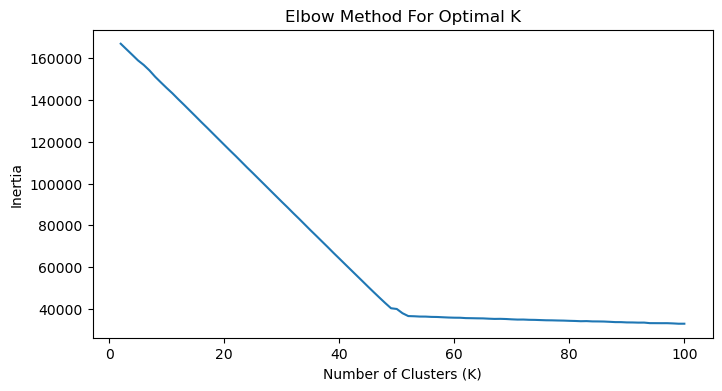

In [25]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia_list)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal K")
plt.show()

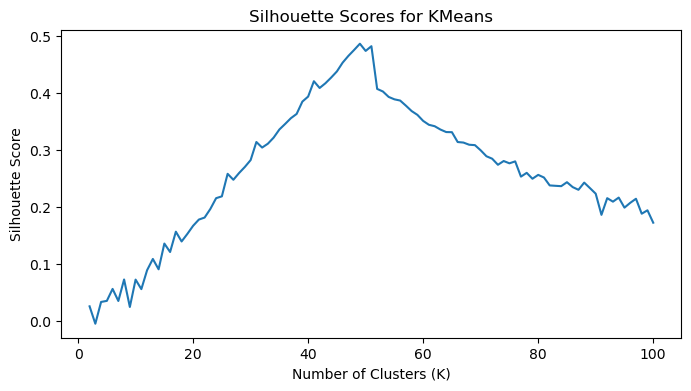

In [26]:
plt.figure(figsize=(8, 4))
plt.plot(K_range, silhouette_list)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for KMeans")
plt.show()

In [32]:
optimal_k = 49
kmeans = KMeans(n_clusters=optimal_k, random_state=13)
cluster_labels = kmeans.fit_predict(X_train)

train_encoded["kmeans_cluster"] = cluster_labels

grouped = train_encoded.groupby("kmeans_cluster")["Churn"]
total_members = grouped.count()
churn_yes_count = grouped.sum()
proportion_churn = churn_yes_count / total_members

cluster_summary = pd.DataFrame({
    "Cluster": total_members.index,
    "Total Members": total_members.values,
    "Churn Yes Count": churn_yes_count.values,
    "Proportion Churn Yes": proportion_churn.values
})

print("Cluster Summary - Proportion of Churn 'Yes' per Cluster:")
cluster_summary.sort_values(by='Proportion Churn Yes', ascending=False)

Cluster Summary - Proportion of Churn 'Yes' per Cluster:


,Cluster,Total Members,Churn Yes Count,Proportion Churn Yes
15,15,55,16,0.290909
41,41,50,14,0.280000
29,29,47,11,0.234043
17,17,60,14,0.233333
14,14,48,11,0.229167
35,35,49,11,0.224490
28,28,49,11,0.224490
32,32,58,13,0.224138
26,26,61,13,0.213115
36,36,43,9,0.209302


In [34]:
cluster_summary["Cluster Churn Label"] = cluster_summary["Proportion Churn Yes"].apply(lambda x: "Yes" if x > 0.14 else "No")
print("Cluster Summary with Churn Label:")
cluster_summary

Cluster Summary with Churn Label:


,Cluster,Total Members,Churn Yes Count,Proportion Churn Yes,Cluster Churn Label
0,0,57,6,0.105263,No
1,1,62,7,0.112903,No
2,2,88,7,0.079545,No
3,3,66,10,0.151515,Yes
4,4,60,8,0.133333,No
5,5,61,4,0.065574,No
6,6,52,10,0.192308,Yes
7,7,67,4,0.059701,No
8,8,51,8,0.156863,Yes
9,9,68,12,0.176471,Yes


## 2. DBSCAN

In [41]:
eps_range = np.linspace(3.0, 10.0, 70)
min_samples_range = range(10, 60)

best_score = -1
best_params = {}

print("Grid search for DBSCAN hyperparameters:")

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_train)
        
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters < 2:
            continue
            
        score = silhouette_score(X_train, labels)
        if score < 0:
            continue
        
        print(f"eps={eps:.2f}, min_samples={min_samples} -> Clusters: {n_clusters}, Silhouette Score: {score:.3f}")
        if score > best_score:
            best_score = score
            best_params = {'eps': eps, 'min_samples': min_samples, 'silhouette_score': score}

best_params

Grid search for DBSCAN hyperparameters:
eps=3.71, min_samples=10 -> Clusters: 54, Silhouette Score: 0.005
eps=3.71, min_samples=11 -> Clusters: 50, Silhouette Score: 0.015
eps=3.71, min_samples=12 -> Clusters: 40, Silhouette Score: 0.017
eps=3.71, min_samples=13 -> Clusters: 33, Silhouette Score: 0.020
eps=3.81, min_samples=10 -> Clusters: 51, Silhouette Score: 0.110
eps=3.81, min_samples=11 -> Clusters: 50, Silhouette Score: 0.064
eps=3.81, min_samples=12 -> Clusters: 51, Silhouette Score: 0.022
eps=3.81, min_samples=13 -> Clusters: 43, Silhouette Score: 0.001
eps=3.81, min_samples=14 -> Clusters: 37, Silhouette Score: 0.059
eps=3.81, min_samples=15 -> Clusters: 34, Silhouette Score: 0.039
eps=3.81, min_samples=16 -> Clusters: 32, Silhouette Score: 0.026
eps=3.81, min_samples=17 -> Clusters: 31, Silhouette Score: 0.010
eps=3.91, min_samples=10 -> Clusters: 51, Silhouette Score: 0.183
eps=3.91, min_samples=11 -> Clusters: 51, Silhouette Score: 0.156
eps=3.91, min_samples=12 -> Clusters

eps=4.42, min_samples=28 -> Clusters: 34, Silhouette Score: 0.191
eps=4.42, min_samples=29 -> Clusters: 32, Silhouette Score: 0.176
eps=4.42, min_samples=30 -> Clusters: 31, Silhouette Score: 0.148
eps=4.42, min_samples=31 -> Clusters: 24, Silhouette Score: 0.109
eps=4.42, min_samples=32 -> Clusters: 22, Silhouette Score: 0.095
eps=4.42, min_samples=33 -> Clusters: 21, Silhouette Score: 0.084
eps=4.42, min_samples=34 -> Clusters: 18, Silhouette Score: 0.065
eps=4.42, min_samples=35 -> Clusters: 16, Silhouette Score: 0.046
eps=4.42, min_samples=36 -> Clusters: 12, Silhouette Score: 0.026
eps=4.42, min_samples=37 -> Clusters: 11, Silhouette Score: 0.020
eps=4.42, min_samples=38 -> Clusters: 10, Silhouette Score: 0.010
eps=4.52, min_samples=10 -> Clusters: 51, Silhouette Score: 0.366
eps=4.52, min_samples=11 -> Clusters: 51, Silhouette Score: 0.364
eps=4.52, min_samples=12 -> Clusters: 51, Silhouette Score: 0.361
eps=4.52, min_samples=13 -> Clusters: 51, Silhouette Score: 0.360
eps=4.52, 

eps=4.83, min_samples=19 -> Clusters: 51, Silhouette Score: 0.389
eps=4.83, min_samples=20 -> Clusters: 51, Silhouette Score: 0.388
eps=4.83, min_samples=21 -> Clusters: 50, Silhouette Score: 0.381
eps=4.83, min_samples=22 -> Clusters: 50, Silhouette Score: 0.379
eps=4.83, min_samples=23 -> Clusters: 50, Silhouette Score: 0.377
eps=4.83, min_samples=24 -> Clusters: 50, Silhouette Score: 0.372
eps=4.83, min_samples=25 -> Clusters: 50, Silhouette Score: 0.369
eps=4.83, min_samples=26 -> Clusters: 50, Silhouette Score: 0.367
eps=4.83, min_samples=27 -> Clusters: 49, Silhouette Score: 0.355
eps=4.83, min_samples=28 -> Clusters: 49, Silhouette Score: 0.346
eps=4.83, min_samples=29 -> Clusters: 49, Silhouette Score: 0.339
eps=4.83, min_samples=30 -> Clusters: 47, Silhouette Score: 0.320
eps=4.83, min_samples=31 -> Clusters: 46, Silhouette Score: 0.301
eps=4.83, min_samples=32 -> Clusters: 46, Silhouette Score: 0.289
eps=4.83, min_samples=33 -> Clusters: 43, Silhouette Score: 0.348
eps=4.83, 

eps=5.13, min_samples=19 -> Clusters: 51, Silhouette Score: 0.406
eps=5.13, min_samples=20 -> Clusters: 51, Silhouette Score: 0.405
eps=5.13, min_samples=21 -> Clusters: 50, Silhouette Score: 0.402
eps=5.13, min_samples=22 -> Clusters: 50, Silhouette Score: 0.400
eps=5.13, min_samples=23 -> Clusters: 50, Silhouette Score: 0.400
eps=5.13, min_samples=24 -> Clusters: 50, Silhouette Score: 0.399
eps=5.13, min_samples=25 -> Clusters: 50, Silhouette Score: 0.399
eps=5.13, min_samples=26 -> Clusters: 50, Silhouette Score: 0.399
eps=5.13, min_samples=27 -> Clusters: 50, Silhouette Score: 0.396
eps=5.13, min_samples=28 -> Clusters: 50, Silhouette Score: 0.393
eps=5.13, min_samples=29 -> Clusters: 50, Silhouette Score: 0.390
eps=5.13, min_samples=30 -> Clusters: 49, Silhouette Score: 0.383
eps=5.13, min_samples=31 -> Clusters: 49, Silhouette Score: 0.382
eps=5.13, min_samples=32 -> Clusters: 49, Silhouette Score: 0.378
eps=5.13, min_samples=33 -> Clusters: 49, Silhouette Score: 0.373
eps=5.13, 

eps=5.33, min_samples=51 -> Clusters: 15, Silhouette Score: 0.113
eps=5.33, min_samples=52 -> Clusters: 13, Silhouette Score: 0.090
eps=5.33, min_samples=53 -> Clusters: 12, Silhouette Score: 0.081
eps=5.33, min_samples=54 -> Clusters: 10, Silhouette Score: 0.058
eps=5.33, min_samples=55 -> Clusters: 8, Silhouette Score: 0.033
eps=5.33, min_samples=56 -> Clusters: 8, Silhouette Score: 0.032
eps=5.33, min_samples=57 -> Clusters: 8, Silhouette Score: 0.031
eps=5.33, min_samples=58 -> Clusters: 7, Silhouette Score: 0.017
eps=5.43, min_samples=10 -> Clusters: 51, Silhouette Score: 0.412
eps=5.43, min_samples=11 -> Clusters: 51, Silhouette Score: 0.412
eps=5.43, min_samples=12 -> Clusters: 51, Silhouette Score: 0.412
eps=5.43, min_samples=13 -> Clusters: 51, Silhouette Score: 0.412
eps=5.43, min_samples=14 -> Clusters: 51, Silhouette Score: 0.412
eps=5.43, min_samples=15 -> Clusters: 51, Silhouette Score: 0.412
eps=5.43, min_samples=16 -> Clusters: 51, Silhouette Score: 0.412
eps=5.43, min_

eps=5.64, min_samples=27 -> Clusters: 50, Silhouette Score: 0.410
eps=5.64, min_samples=28 -> Clusters: 50, Silhouette Score: 0.410
eps=5.64, min_samples=29 -> Clusters: 50, Silhouette Score: 0.410
eps=5.64, min_samples=30 -> Clusters: 50, Silhouette Score: 0.410
eps=5.64, min_samples=31 -> Clusters: 50, Silhouette Score: 0.410
eps=5.64, min_samples=32 -> Clusters: 50, Silhouette Score: 0.410
eps=5.64, min_samples=33 -> Clusters: 50, Silhouette Score: 0.409
eps=5.64, min_samples=34 -> Clusters: 49, Silhouette Score: 0.401
eps=5.64, min_samples=35 -> Clusters: 49, Silhouette Score: 0.401
eps=5.64, min_samples=36 -> Clusters: 48, Silhouette Score: 0.389
eps=5.64, min_samples=37 -> Clusters: 48, Silhouette Score: 0.389
eps=5.64, min_samples=38 -> Clusters: 48, Silhouette Score: 0.388
eps=5.64, min_samples=39 -> Clusters: 47, Silhouette Score: 0.376
eps=5.64, min_samples=40 -> Clusters: 45, Silhouette Score: 0.354
eps=5.64, min_samples=41 -> Clusters: 45, Silhouette Score: 0.354
eps=5.64, 

eps=5.84, min_samples=54 -> Clusters: 17, Silhouette Score: 0.148
eps=5.84, min_samples=55 -> Clusters: 15, Silhouette Score: 0.124
eps=5.84, min_samples=56 -> Clusters: 14, Silhouette Score: 0.111
eps=5.84, min_samples=57 -> Clusters: 13, Silhouette Score: 0.099
eps=5.84, min_samples=58 -> Clusters: 12, Silhouette Score: 0.087
eps=5.84, min_samples=59 -> Clusters: 10, Silhouette Score: 0.063
eps=5.94, min_samples=10 -> Clusters: 50, Silhouette Score: 0.473
eps=5.94, min_samples=11 -> Clusters: 50, Silhouette Score: 0.473
eps=5.94, min_samples=12 -> Clusters: 50, Silhouette Score: 0.473
eps=5.94, min_samples=13 -> Clusters: 50, Silhouette Score: 0.473
eps=5.94, min_samples=14 -> Clusters: 50, Silhouette Score: 0.473
eps=5.94, min_samples=15 -> Clusters: 50, Silhouette Score: 0.473
eps=5.94, min_samples=16 -> Clusters: 50, Silhouette Score: 0.473
eps=5.94, min_samples=17 -> Clusters: 50, Silhouette Score: 0.473
eps=5.94, min_samples=18 -> Clusters: 50, Silhouette Score: 0.473
eps=5.94, 

eps=6.14, min_samples=30 -> Clusters: 49, Silhouette Score: 0.473
eps=6.14, min_samples=31 -> Clusters: 49, Silhouette Score: 0.473
eps=6.14, min_samples=32 -> Clusters: 49, Silhouette Score: 0.473
eps=6.14, min_samples=33 -> Clusters: 49, Silhouette Score: 0.473
eps=6.14, min_samples=34 -> Clusters: 49, Silhouette Score: 0.473
eps=6.14, min_samples=35 -> Clusters: 49, Silhouette Score: 0.473
eps=6.14, min_samples=36 -> Clusters: 48, Silhouette Score: 0.464
eps=6.14, min_samples=37 -> Clusters: 47, Silhouette Score: 0.454
eps=6.14, min_samples=38 -> Clusters: 47, Silhouette Score: 0.454
eps=6.14, min_samples=39 -> Clusters: 46, Silhouette Score: 0.444
eps=6.14, min_samples=40 -> Clusters: 46, Silhouette Score: 0.444
eps=6.14, min_samples=41 -> Clusters: 45, Silhouette Score: 0.434
eps=6.14, min_samples=42 -> Clusters: 45, Silhouette Score: 0.434
eps=6.14, min_samples=43 -> Clusters: 44, Silhouette Score: 0.423
eps=6.14, min_samples=44 -> Clusters: 42, Silhouette Score: 0.402
eps=6.14, 

eps=6.35, min_samples=56 -> Clusters: 17, Silhouette Score: 0.122
eps=6.35, min_samples=57 -> Clusters: 14, Silhouette Score: 0.085
eps=6.35, min_samples=58 -> Clusters: 14, Silhouette Score: 0.085
eps=6.35, min_samples=59 -> Clusters: 14, Silhouette Score: 0.085
eps=6.45, min_samples=10 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=11 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=12 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=13 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=14 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=15 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=16 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=17 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=18 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=19 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, min_samples=20 -> Clusters: 50, Silhouette Score: 0.472
eps=6.45, 

eps=6.65, min_samples=33 -> Clusters: 45, Silhouette Score: 0.456
eps=6.65, min_samples=34 -> Clusters: 45, Silhouette Score: 0.456
eps=6.65, min_samples=35 -> Clusters: 45, Silhouette Score: 0.456
eps=6.65, min_samples=36 -> Clusters: 44, Silhouette Score: 0.448
eps=6.65, min_samples=37 -> Clusters: 43, Silhouette Score: 0.439
eps=6.65, min_samples=38 -> Clusters: 43, Silhouette Score: 0.439
eps=6.65, min_samples=39 -> Clusters: 42, Silhouette Score: 0.429
eps=6.65, min_samples=40 -> Clusters: 42, Silhouette Score: 0.429
eps=6.65, min_samples=41 -> Clusters: 42, Silhouette Score: 0.429
eps=6.65, min_samples=42 -> Clusters: 41, Silhouette Score: 0.419
eps=6.65, min_samples=43 -> Clusters: 41, Silhouette Score: 0.419
eps=6.65, min_samples=44 -> Clusters: 39, Silhouette Score: 0.398
eps=6.65, min_samples=45 -> Clusters: 36, Silhouette Score: 0.367
eps=6.65, min_samples=46 -> Clusters: 32, Silhouette Score: 0.325
eps=6.65, min_samples=47 -> Clusters: 32, Silhouette Score: 0.325
eps=6.65, 

eps=6.86, min_samples=59 -> Clusters: 7, Silhouette Score: 0.048
eps=6.96, min_samples=10 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=11 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=12 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=13 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=14 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=15 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=16 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=17 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=18 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=19 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=20 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=21 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=22 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, min_samples=23 -> Clusters: 40, Silhouette Score: 0.396
eps=6.96, m

eps=7.16, min_samples=35 -> Clusters: 34, Silhouette Score: 0.347
eps=7.16, min_samples=36 -> Clusters: 33, Silhouette Score: 0.339
eps=7.16, min_samples=37 -> Clusters: 32, Silhouette Score: 0.330
eps=7.16, min_samples=38 -> Clusters: 32, Silhouette Score: 0.330
eps=7.16, min_samples=39 -> Clusters: 31, Silhouette Score: 0.320
eps=7.16, min_samples=40 -> Clusters: 31, Silhouette Score: 0.320
eps=7.16, min_samples=41 -> Clusters: 31, Silhouette Score: 0.320
eps=7.16, min_samples=42 -> Clusters: 30, Silhouette Score: 0.311
eps=7.16, min_samples=43 -> Clusters: 30, Silhouette Score: 0.311
eps=7.16, min_samples=44 -> Clusters: 28, Silhouette Score: 0.291
eps=7.16, min_samples=45 -> Clusters: 25, Silhouette Score: 0.260
eps=7.16, min_samples=46 -> Clusters: 21, Silhouette Score: 0.219
eps=7.16, min_samples=47 -> Clusters: 21, Silhouette Score: 0.219
eps=7.16, min_samples=48 -> Clusters: 20, Silhouette Score: 0.208
eps=7.16, min_samples=49 -> Clusters: 17, Silhouette Score: 0.176
eps=7.16, 

eps=7.46, min_samples=24 -> Clusters: 28, Silhouette Score: 0.280
eps=7.46, min_samples=25 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=26 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=27 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=28 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=29 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=30 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=31 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=32 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=33 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=34 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=35 -> Clusters: 27, Silhouette Score: 0.280
eps=7.46, min_samples=36 -> Clusters: 26, Silhouette Score: 0.272
eps=7.46, min_samples=37 -> Clusters: 25, Silhouette Score: 0.263
eps=7.46, min_samples=38 -> Clusters: 25, Silhouette Score: 0.263
eps=7.46, 

eps=7.77, min_samples=26 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=27 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=28 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=29 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=30 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=31 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=32 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=33 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=34 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=35 -> Clusters: 18, Silhouette Score: 0.198
eps=7.77, min_samples=36 -> Clusters: 17, Silhouette Score: 0.190
eps=7.77, min_samples=37 -> Clusters: 16, Silhouette Score: 0.181
eps=7.77, min_samples=38 -> Clusters: 16, Silhouette Score: 0.181
eps=7.77, min_samples=39 -> Clusters: 15, Silhouette Score: 0.172
eps=7.77, min_samples=40 -> Clusters: 15, Silhouette Score: 0.172
eps=7.77, 

eps=8.07, min_samples=40 -> Clusters: 5, Silhouette Score: 0.090
eps=8.07, min_samples=41 -> Clusters: 5, Silhouette Score: 0.090
eps=8.07, min_samples=42 -> Clusters: 4, Silhouette Score: 0.080
eps=8.07, min_samples=43 -> Clusters: 4, Silhouette Score: 0.080
eps=8.07, min_samples=44 -> Clusters: 2, Silhouette Score: 0.061
eps=8.07, min_samples=45 -> Clusters: 2, Silhouette Score: 0.061
eps=8.17, min_samples=10 -> Clusters: 6, Silhouette Score: 0.106
eps=8.17, min_samples=11 -> Clusters: 6, Silhouette Score: 0.106
eps=8.17, min_samples=12 -> Clusters: 6, Silhouette Score: 0.106
eps=8.17, min_samples=13 -> Clusters: 6, Silhouette Score: 0.106
eps=8.17, min_samples=14 -> Clusters: 6, Silhouette Score: 0.106
eps=8.17, min_samples=15 -> Clusters: 6, Silhouette Score: 0.106
eps=8.17, min_samples=16 -> Clusters: 6, Silhouette Score: 0.106
eps=8.17, min_samples=17 -> Clusters: 6, Silhouette Score: 0.106
eps=8.17, min_samples=18 -> Clusters: 6, Silhouette Score: 0.106
eps=8.17, min_samples=19 

eps=8.48, min_samples=38 -> Clusters: 2, Silhouette Score: 0.093
eps=8.58, min_samples=10 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=11 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=12 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=13 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=14 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=15 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=16 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=17 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=18 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=19 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=20 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=21 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=22 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=23 -> Clusters: 5, Silhouette Score: 0.110
eps=8.58, min_samples=24 

eps=8.99, min_samples=26 -> Clusters: 2, Silhouette Score: 0.109
eps=8.99, min_samples=27 -> Clusters: 2, Silhouette Score: 0.109
eps=8.99, min_samples=28 -> Clusters: 2, Silhouette Score: 0.109
eps=8.99, min_samples=29 -> Clusters: 2, Silhouette Score: 0.109
eps=8.99, min_samples=30 -> Clusters: 2, Silhouette Score: 0.109
eps=8.99, min_samples=31 -> Clusters: 2, Silhouette Score: 0.109
eps=8.99, min_samples=32 -> Clusters: 2, Silhouette Score: 0.109
eps=8.99, min_samples=33 -> Clusters: 2, Silhouette Score: 0.109
eps=8.99, min_samples=34 -> Clusters: 2, Silhouette Score: 0.109
eps=8.99, min_samples=35 -> Clusters: 2, Silhouette Score: 0.109
eps=9.09, min_samples=10 -> Clusters: 2, Silhouette Score: 0.193
eps=9.09, min_samples=11 -> Clusters: 2, Silhouette Score: 0.193
eps=9.09, min_samples=12 -> Clusters: 2, Silhouette Score: 0.193
eps=9.09, min_samples=13 -> Clusters: 2, Silhouette Score: 0.193
eps=9.09, min_samples=14 -> Clusters: 2, Silhouette Score: 0.193
eps=9.09, min_samples=15 

eps=9.80, min_samples=22 -> Clusters: 2, Silhouette Score: 0.193
eps=9.80, min_samples=23 -> Clusters: 2, Silhouette Score: 0.193
eps=9.80, min_samples=24 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=10 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=11 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=12 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=13 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=14 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=15 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=16 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=17 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=18 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=19 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=20 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=21 -> Clusters: 2, Silhouette Score: 0.193
eps=9.90, min_samples=22 

{'eps': 6.043478260869565,
 'min_samples': 10,
 'silhouette_score': 0.4730467165856809}

In [43]:
optimal_eps = 6.043478260869565
optimal_min_samples = 10

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
dbscan_labels = dbscan.fit_predict(X_train)

train_encoded = train_encoded.drop("kmeans_cluster", axis=1)
train_encoded["dbscan_cluster"] = dbscan_labels

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)
print(f"DBSCAN identified {n_clusters} clusters and {n_noise} noise points.")

DBSCAN identified 50 clusters and 2 noise points.


In [40]:
grouped = train_encoded.groupby("dbscan_cluster")["Churn"]
total_members = grouped.count()
churn_yes_count = grouped.sum()
proportion_churn = churn_yes_count / total_members

cluster_summary = pd.DataFrame({
    "Cluster": total_members.index,
    "Total Members": total_members.values,
    "Churn Yes Count": churn_yes_count.values,
    "Proportion Churn Yes": proportion_churn.values
})

print("Cluster Summary - Proportion of Churn 'Yes' per Cluster:")
cluster_summary.sort_values(by='Proportion Churn Yes', ascending=False)

Cluster Summary - Proportion of Churn 'Yes' per Cluster:


,Cluster,Total Members,Churn Yes Count,Proportion Churn Yes
0,-1,2,2,1.000000
15,14,55,16,0.290909
3,2,50,14,0.280000
24,23,47,11,0.234043
39,38,60,14,0.233333
42,41,48,11,0.229167
45,44,49,11,0.224490
41,40,49,11,0.224490
47,46,36,8,0.222222
36,35,61,13,0.213115


In [44]:
cluster_summary["Cluster Churn Label"] = cluster_summary["Proportion Churn Yes"].apply(lambda x: "Yes" if x > 0.2 else "No")
print("Cluster Summary with Churn Label:")
cluster_summary

Cluster Summary with Churn Label:


,Cluster,Total Members,Churn Yes Count,Proportion Churn Yes,Cluster Churn Label
0,-1,2,2,1.000000,Yes
1,0,52,10,0.192308,No
2,1,66,10,0.151515,No
3,2,50,14,0.280000,Yes
4,3,52,7,0.134615,No
5,4,66,7,0.106061,No
6,5,52,8,0.153846,No
7,6,51,5,0.098039,No
8,7,131,10,0.076336,No
9,8,48,3,0.062500,No


Discussion:
1. Should area code be removed so that it won't be scaled?
2. Do K-Means and DBSCAN with 49 clusters make sense?
3. How do we label the churn after clustering them in N in which N >> 2?